In [167]:
# Importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [169]:
# Preprocessing data

df = pd.read_excel("C:\\Users\\Vivek\\Documents\\Interviews\\Viva Finance Underwriting Data.xlsx", header=0) 
df = data.dropna()
print(list(data.columns))

['loanid', 'Delinquent?', 'installment_balance', 'revolving_balance', 'past_due_amount', 'monthly_payment', 'revolving_available_percent', 'total_inquiries', 'inquiries_during_last6_months', 'total_trade_items', 'paid_accounts', 'satisfactory_accounts', 'now_delinquent_derog', 'was_delinquent_derog', 'delinquencies30_days', 'delinquencies60_days', 'delinquencies90to180_days', 'job_start_date', 'fico_score', 'verified_income', 'bankruptcy_cases_last8_years', 'bankruptcy_cases_last_year', 'number_past_due_utility_rent', 'number_installment_charge_off', 'job_title']


In [170]:
# Split data in training and testing sets

df_dummies = pd.get_dummies(df)

df_dummies.drop(drop_columns, axis=1, inplace=True)

X = df_dummies.drop('Delinquent?', axis=1)
y = df_dummies['Delinquent?']

df_dummies.head()

,Delinquent?,installment_balance,revolving_balance,past_due_amount,monthly_payment,revolving_available_percent,total_inquiries,inquiries_during_last6_months,total_trade_items,paid_accounts,...,delinquencies60_days,delinquencies90to180_days,fico_score,verified_income,bankruptcy_cases_last8_years,bankruptcy_cases_last_year,number_past_due_utility_rent,number_installment_charge_off,job_title_Teacher,job_title_Teacher
0,1,24606.0,2467,2194,1056,24,22,11,13,2,...,0,4,562,43254,9,0,1,2,False,False
1,0,64095.0,4799,15165,1298,54,53,16,45,25,...,8,20,481,61941,7,0,0,4,False,False
2,0,10138.0,1938,228,316,27,17,6,16,6,...,1,1,608,48426,6,1,0,1,False,False
3,0,7564.0,0,0,105,0,43,5,9,3,...,0,0,557,30029,6,0,0,0,False,False
4,1,54119.0,2339,1022,69,21,4,0,11,4,...,1,2,527,56250,6,0,0,0,False,False


In [86]:
# Fit a logistic regression model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
lr = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')

model = Pipeline([('scaler', sc), ('clf', lr)])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [84]:
# Performing Recusive Feature Selection to select relevant variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True]
[3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1]


C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [75]:
# Testing model accuracy

model.score(X_train, y_train)

0.7939655172413793

In [76]:
# Which features are the most important

for i in np.argsort(-np.abs(model.named_steps['clf'].coef_[0])):
    print(X.columns[i], ': ', round(model.named_steps['clf'].coef_[0,i], 2))

fico_score :  -1.13
installment_balance :  0.0
number_installment_charge_off :  0.0
number_past_due_utility_rent :  0.0
bankruptcy_cases_last_year :  0.0
bankruptcy_cases_last8_years :  0.0
verified_income :  0.0
delinquencies90to180_days :  0.0
delinquencies60_days :  0.0
delinquencies30_days :  0.0
job_title_Teacher :  0.0
was_delinquent_derog :  0.0
satisfactory_accounts :  0.0
paid_accounts :  0.0
total_trade_items :  0.0
inquiries_during_last6_months :  0.0
total_inquiries :  0.0
revolving_available_percent :  0.0
monthly_payment :  0.0
past_due_amount :  0.0
revolving_balance :  0.0
now_delinquent_derog :  0.0
job_title_Teacher  :  0.0


ROC-AUC-score:  0.6352685851807116


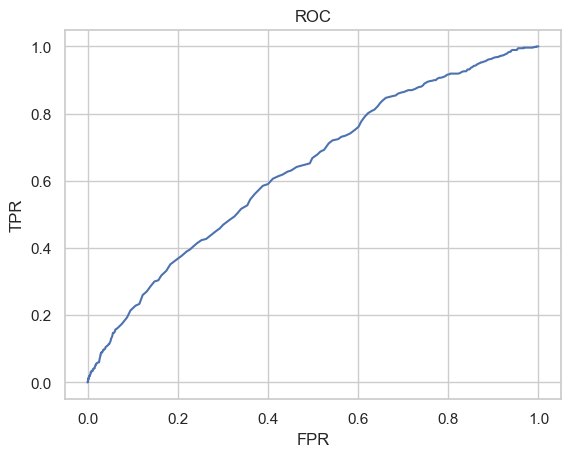

In [77]:
# Plotting the ROC curve using the false positive rate (fpr) and true positive rate (tpr).

test_probas = model.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [158]:
# Display probabilities of top 10 rows

probabilities = pd.DataFrame(test_probas)
print(probabilities.head(10))

          0
0  0.222016
1  0.219378
2  0.234162
3  0.173554
4  0.219378
5  0.245814
6  0.194249
7  0.234621
8  0.218941
9  0.245814


In [164]:
# Descriptive statistics for revolving balances, incomes, and FICO scores

X_train['revolving_balance'].describe()

count     11600.000000
mean       6185.318276
std       10880.156215
min           0.000000
25%         850.750000
50%        2712.000000
75%        7234.250000
max      288712.000000
Name: revolving_balance, dtype: float64

In [161]:
X_train['verified_income'].describe()

count    1.160000e+04
mean     4.490915e+04
std      1.306771e+05
min      5.000000e+01
25%      2.889900e+04
50%      3.790400e+04
75%      4.970200e+04
max      6.441462e+06
Name: verified_income, dtype: float64

In [162]:
X_train['fico_score'].describe()

count    11600.000000
mean       578.559310
std         47.650507
min        371.000000
25%        548.000000
50%        572.000000
75%        604.000000
max        813.000000
Name: fico_score, dtype: float64